<a href="https://colab.research.google.com/github/nchaudhary1/employee_attrition/blob/main/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
train_data = pd.read_csv('/content/drive/MyDrive/Employee_attrition/train_data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Employee_attrition/test_data.csv')
submission_data = pd.read_csv('/content/drive/MyDrive/Employee_attrition/sample_submission.csv')

In [58]:
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [59]:
test_data.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [60]:
submission_data.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


In [61]:
print(train_data.shape)
print(test_data.shape)
submission_data.shape

(19104, 13)
(741, 1)


(741, 2)

In [62]:
train_data['Emp_ID'].value_counts()

2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: Emp_ID, Length: 2381, dtype: int64

In [63]:
train_data.isna().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [64]:
train_data['target'] = np.where(train_data['LastWorkingDate'].isna(),0,1)
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
 13  target                19104 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.0+ MB


In [66]:
train_data.isna().sum()

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
target                      0
dtype: int64

In [67]:
col_name = train_data.columns
for i in col_name:
    print(i, 'has :',train_data[i].nunique(), 'unique values')

MMM-YY has : 24 unique values
Emp_ID has : 2381 unique values
Age has : 36 unique values
Gender has : 2 unique values
City has : 29 unique values
Education_Level has : 3 unique values
Salary has : 2383 unique values
Dateofjoining has : 869 unique values
LastWorkingDate has : 493 unique values
Joining Designation has : 5 unique values
Designation has : 5 unique values
Total Business Value has : 10181 unique values
Quarterly Rating has : 4 unique values
target has : 2 unique values


In [68]:
train_data.head(10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,0
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1


In [69]:
train_data.shape

(19104, 14)

In [70]:
train_data.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'target'],
      dtype='object')

In [71]:
train_data.drop(columns = ['MMM-YY','Dateofjoining','LastWorkingDate'], inplace = True)

In [72]:
train_data['Emp_ID'].dtype

dtype('int64')

In [84]:
train_data.drop_duplicates(subset = 'Emp_ID', inplace = True)

In [85]:
train_data.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,target
0,1,28,Male,C23,Master,57387,1,1,2381060,2,0
3,2,31,Male,C7,Master,67016,2,2,0,1,0
5,4,43,Male,C13,Master,65603,2,2,0,1,0
10,5,29,Male,C9,College,46368,1,1,0,1,0
13,6,31,Female,C11,Bachelor,78728,3,3,0,1,0


In [87]:
train_data.shape

(2381, 11)

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 19097
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                2381 non-null   int64 
 1   Age                   2381 non-null   int64 
 2   Gender                2381 non-null   object
 3   City                  2381 non-null   object
 4   Education_Level       2381 non-null   object
 5   Salary                2381 non-null   int64 
 6   Joining Designation   2381 non-null   int64 
 7   Designation           2381 non-null   int64 
 8   Total Business Value  2381 non-null   int64 
 9   Quarterly Rating      2381 non-null   int64 
 10  target                2381 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 223.2+ KB


In [92]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_data['Gender'] = labelencoder.fit_transform(train_data['Gender'])
train_data['City'] = labelencoder.fit_transform(train_data['City'])
train_data['Education_Level'] = labelencoder.fit_transform(train_data['Education_Level'])

In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 19097
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Emp_ID                2381 non-null   int64
 1   Age                   2381 non-null   int64
 2   Gender                2381 non-null   int64
 3   City                  2381 non-null   int64
 4   Education_Level       2381 non-null   int64
 5   Salary                2381 non-null   int64
 6   Joining Designation   2381 non-null   int64
 7   Designation           2381 non-null   int64
 8   Total Business Value  2381 non-null   int64
 9   Quarterly Rating      2381 non-null   int64
 10  target                2381 non-null   int64
dtypes: int64(11)
memory usage: 223.2 KB


In [94]:
corr = train_data.corr()
corr

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,target
Emp_ID,1.000000,-0.008277,-0.013707,0.033494,-0.008384,-0.017310,-0.023126,-0.011842,0.048617,0.040447,0.017483
Age,-0.008277,1.000000,-0.031258,-0.008124,-0.038345,0.185630,0.099742,0.224630,0.111732,0.156958,0.011291
Gender,-0.013707,-0.031258,1.000000,-0.034293,0.013420,-0.006852,0.046056,0.006173,-0.007283,0.014498,0.007817
City,0.033494,-0.008124,-0.034293,1.000000,0.006556,0.011677,0.003196,-0.010054,-0.023648,0.005487,-0.013973
Education_Level,-0.008384,-0.038345,0.013420,0.006556,1.000000,0.044654,-0.001062,-0.022333,-0.033745,-0.012544,-0.000759
Salary,-0.017310,0.185630,-0.006852,0.011677,0.044654,1.000000,0.484837,0.738378,0.238172,0.123181,-0.113501
Joining Designation,-0.023126,0.099742,0.046056,0.003196,-0.001062,0.484837,1.000000,0.732204,-0.170735,-0.282392,-0.083000
Designation,-0.011842,0.224630,0.006173,-0.010054,-0.022333,0.738378,0.732204,1.000000,0.210057,0.003813,-0.120310
Total Business Value,0.048617,0.111732,-0.007283,-0.023648,-0.033745,0.238172,-0.170735,0.210057,1.000000,0.598183,-0.075619
Quarterly Rating,0.040447,0.156958,0.014498,0.005487,-0.012544,0.123181,-0.282392,0.003813,0.598183,1.000000,-0.123345


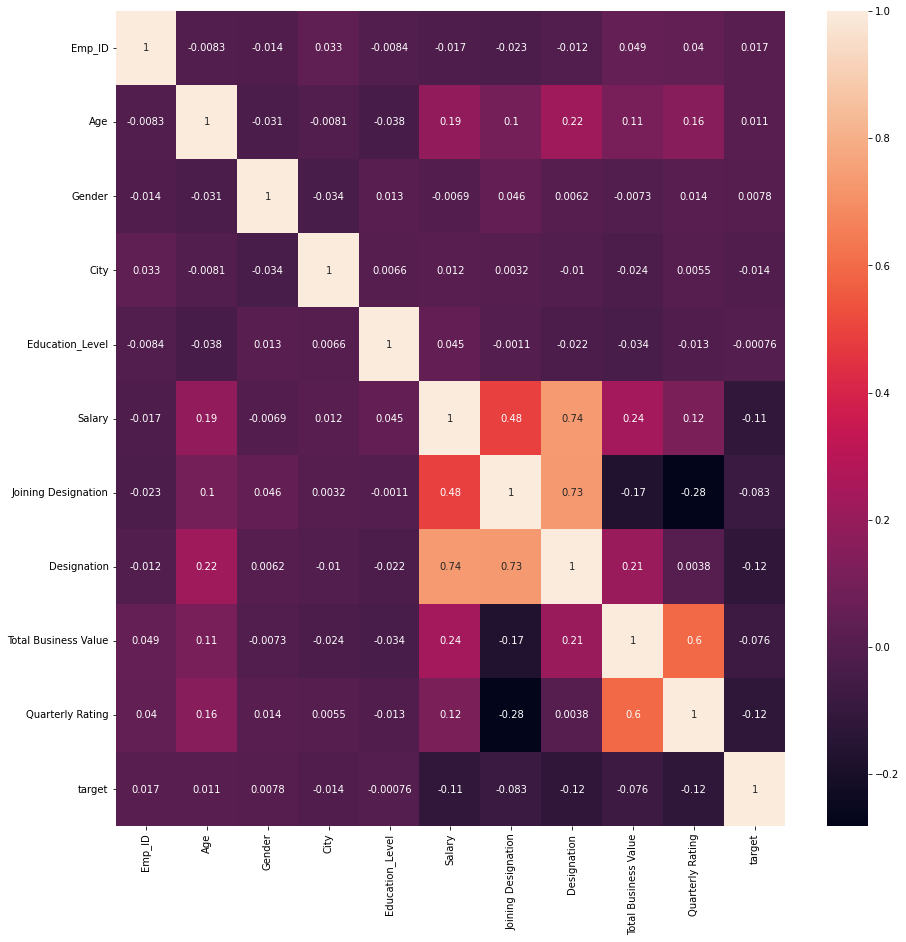

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True)

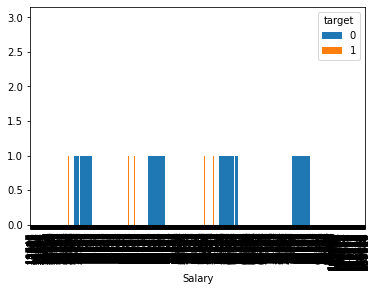

In [102]:
pd.crosstab(train_data['Salary'], train_data['target']).plot(kind = 'bar')

In [103]:
X = train_data.iloc[:,:-1]
Y = train_data.iloc[:,-1]

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test =train_test_split(X,Y, test_size = 0.3)


In [105]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(verbose = 1)
model.fit(X_train, Y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(verbose=1)

In [107]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [108]:
from sklearn.metrics import accuracy_score, confusion_matrix
score = accuracy_score(predictions, Y_test)
score

0.9594405594405594

In [109]:
cm = confusion_matrix(predictions, Y_test)
cm

array([[686,  29],
       [  0,   0]])

In [110]:
test_data_final = pd.merge(test_data, train_data, on = 'Emp_ID')
test_data_final

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,target
0,394,32,0,12,2,97722,2,4,189360,1,0
1,173,37,1,20,1,56174,1,3,1295750,2,0
2,1090,37,1,4,1,96750,2,4,1382660,3,0
3,840,39,0,27,1,88813,1,4,391050,1,0
4,308,30,1,24,2,188418,2,5,1507300,3,0
...,...,...,...,...,...,...,...,...,...,...,...
736,2134,38,1,21,1,116006,2,5,3198430,4,0
737,2255,38,1,17,1,133489,3,4,1005280,2,0
738,448,35,1,1,0,65389,2,4,3011170,3,0
739,1644,46,0,28,0,105513,2,4,1051620,2,0


In [112]:
test = test_data_final.drop(['target'], axis = 1)
test

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,394,32,0,12,2,97722,2,4,189360,1
1,173,37,1,20,1,56174,1,3,1295750,2
2,1090,37,1,4,1,96750,2,4,1382660,3
3,840,39,0,27,1,88813,1,4,391050,1
4,308,30,1,24,2,188418,2,5,1507300,3
...,...,...,...,...,...,...,...,...,...,...
736,2134,38,1,21,1,116006,2,5,3198430,4
737,2255,38,1,17,1,133489,3,4,1005280,2
738,448,35,1,1,0,65389,2,4,3011170,3
739,1644,46,0,28,0,105513,2,4,1051620,2


In [113]:
final_predictions = model.predict(test)
final_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [114]:
submission_data['target'] = final_predictions

In [118]:
submission_data.drop(['Target'], axis = 1)

,Emp_ID,target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0
